In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../data/user_acquisition.csv")
df.head()

,platform,creative_id,impressions,clicks,installs,cost
0,Google UAC,D,5860,101,51,199.21
1,Meta,C,18526,228,124,200.28
2,Google UAC,B,5769,224,128,50.19
3,TikTok,A,9555,329,66,55.77
4,Google UAC,C,7558,117,37,141.59


In [8]:
#KPI Calculations

df["CTR"] = df["clicks"] / df["impressions"]
df["CVR"] = df["installs"] / df["clicks"]
df["CPI"] = df["cost"] / df["installs"]

df.replace([float("inf"), -float("inf")], pd.NA, inplace=True)
df.dropna(subset=["CTR", "CVR", "CPI"], inplace=True)

df[["platform", "creative_id", "CTR", "CVR", "CPI"]].head()


,platform,creative_id,CTR,CVR,CPI
0,Google UAC,D,0.017235,0.504950,3.906078
1,Meta,C,0.012307,0.543860,1.615161
2,Google UAC,B,0.038828,0.571429,0.392109
3,TikTok,A,0.034432,0.200608,0.845000
4,Google UAC,C,0.015480,0.316239,3.826757


In [9]:
# KPI Average

platform_means = df.groupby("platform")[["CTR", "CVR", "CPI"]].mean().reset_index()
platform_means


,platform,CTR,CVR,CPI
0,Google UAC,0.029612,0.434072,2.007643
1,Meta,0.028937,0.363461,2.150275
2,TikTok,0.029880,0.390949,1.713299


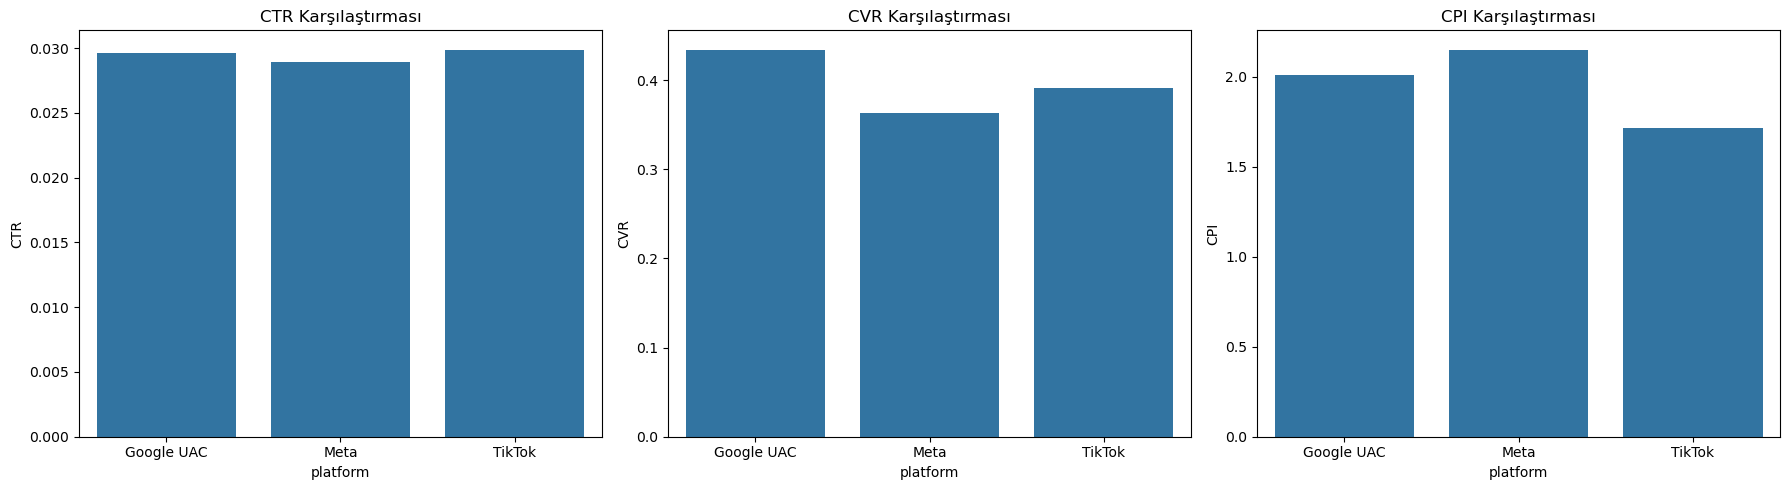

In [10]:
# KPI Comparison Bar charts

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.barplot(data=platform_means, x="platform", y="CTR", ax=axes[0])
axes[0].set_title("CTR Karşılaştırması")

sns.barplot(data=platform_means, x="platform", y="CVR", ax=axes[1])
axes[1].set_title("CVR Karşılaştırması")

sns.barplot(data=platform_means, x="platform", y="CPI", ax=axes[2])
axes[2].set_title("CPI Karşılaştırması")

plt.tight_layout()
plt.show()


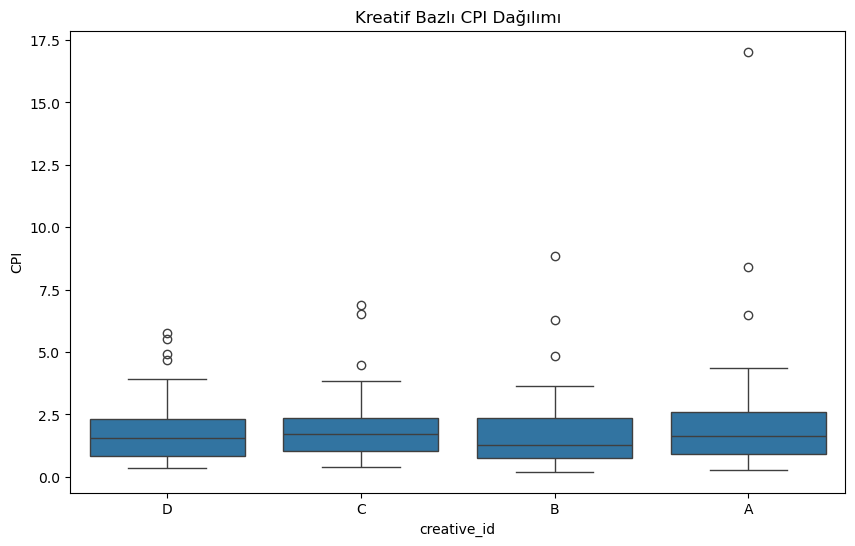

In [11]:
# Creative (A/B) Comparison

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="creative_id", y="CPI")
plt.title("Kreatif Bazlı CPI Dağılımı")
plt.show()

In [12]:
# Choose the Most Efficient Combination

grouped = df.groupby(["platform", "creative_id"]).agg({
    "CTR": "mean",
    "CVR": "mean",
    "CPI": "mean"
}).reset_index()

best = grouped.sort_values(by=["CPI", "CVR"], ascending=[True, False]).head(1)
best.to_csv("../data/best_channel_creative.csv", index=False)
best


,platform,creative_id,CTR,CVR,CPI
10,TikTok,C,0.030256,0.404973,1.435036
